In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model



## Import and processing data

In [133]:
x_train = pd.read_csv('train.csv')
y_train = np.asarray(x_train['label'], dtype='float32')
x_train = x_train.drop('label', axis=1)
x_test = pd.read_csv('test.csv')

In [57]:
#x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full, test_size=.10, random_state=42)

In [135]:
x_train = x_train.values.reshape(-1,28,28,1)
x_train = x_train.astype('float32') / 255.

In [62]:
#x_valid = x_valid.values.reshape(-1,28,28,1)
#x_valid = x_valid.astype('float32') / 255.

In [136]:
x_test = x_test.values.reshape(-1,28,28,1)
x_test = x_test.astype('float32') / 255.

In [140]:
x_train.shape

(42000, 28, 28, 1)

In [141]:
x_test.shape

(28000, 28, 28, 1)

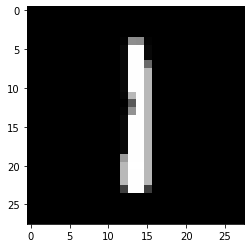

In [142]:
# Plot image data from x_train
plt.imshow(x_train[2], cmap = "gray")
plt.show()

## Define autoencoder and train model

In [143]:
#Adding noise to images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [258]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),                  
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),   
            layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),    
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),          
            layers.Conv2D(1, kernel_size=3,activation="sigmoid", padding="same")
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Denoise()

In [259]:
autoencoder.compile(optimizer='adam', loss="binary_crossentropy",metrics=["accuracy"])

In [260]:
history=autoencoder.fit(x_train_noisy, x_train, epochs=10, validation_split=0.1)

Epoch 1/10
1182/1182 [==============================] - 35s 30ms/step - loss: 0.1009 - accuracy: 0.8140 - val_loss: 0.0720 - val_accuracy: 0.8150
Epoch 2/10
1182/1182 [==============================] - 35s 30ms/step - loss: 0.0716 - accuracy: 0.8152 - val_loss: 0.0712 - val_accuracy: 0.8150
Epoch 3/10
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0708 - accuracy: 0.8152 - val_loss: 0.0704 - val_accuracy: 0.8150
Epoch 4/10
1182/1182 [==============================] - 41s 35ms/step - loss: 0.0704 - accuracy: 0.8152 - val_loss: 0.0701 - val_accuracy: 0.8150
Epoch 5/10
1182/1182 [==============================] - 41s 35ms/step - loss: 0.0700 - accuracy: 0.8152 - val_loss: 0.0698 - val_accuracy: 0.8150
Epoch 6/10
1182/1182 [==============================] - 35s 30ms/step - loss: 0.0697 - accuracy: 0.8152 - val_loss: 0.0695 - val_accuracy: 0.8150
Epoch 7/10
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0695 - accuracy: 0.8152 - val_loss: 0.0695 -

In [261]:
history.history

{'loss': [0.10088429600000381,
  0.07155349850654602,
  0.07084143161773682,
  0.0703631266951561,
  0.06998566538095474,
  0.06970416009426117,
  0.06952923536300659,
  0.06938165426254272,
  0.0692702978849411,
  0.0691695511341095],
 'accuracy': [0.8139694929122925,
  0.8152240514755249,
  0.8152337670326233,
  0.8152393102645874,
  0.8152428865432739,
  0.8152432441711426,
  0.815244734287262,
  0.8152461051940918,
  0.8152470588684082,
  0.8152484893798828],
 'val_loss': [0.07195045799016953,
  0.07118789851665497,
  0.07039184123277664,
  0.07005298137664795,
  0.06978459656238556,
  0.06947673857212067,
  0.0695253387093544,
  0.06942672282457352,
  0.06912772357463837,
  0.06900892406702042],
 'val_accuracy': [0.815008819103241,
  0.8150163888931274,
  0.8150321841239929,
  0.8150349259376526,
  0.8150376677513123,
  0.8150398135185242,
  0.8150416016578674,
  0.8150418996810913,
  0.8150398135185242,
  0.8150413036346436]}

In [262]:
autoencoder.summary()

Model: "denoise_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_107 (Sequential)  (None, 7, 7, 32)          4800      
_________________________________________________________________
sequential_108 (Sequential)  (None, 28, 28, 1)         14017     
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________


## Image Visualization

In [263]:
samples=x_train_noisy[:5]
targets=y_train[:5]
denoised_images=autoencoder.predict(samples)

In [264]:
samples.shape

TensorShape([5, 28, 28, 1])

In [265]:
denoised_images.shape

(5, 28, 28, 1)

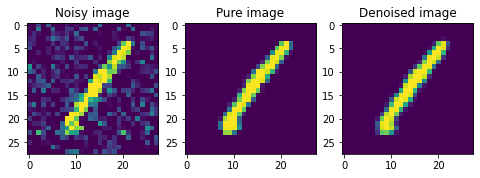

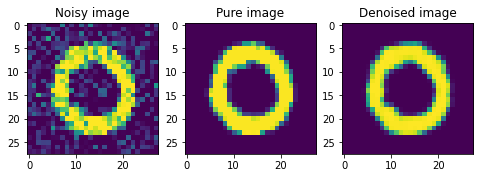

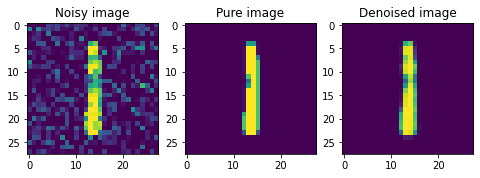

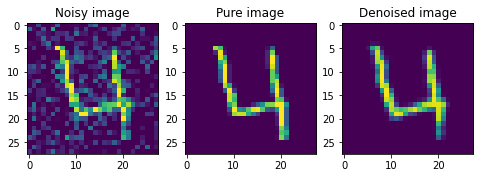

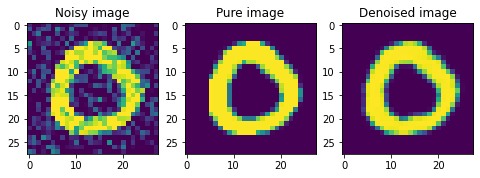

In [266]:
for i in range(0,5):
    noisy_image=x_train_noisy[i][:,:,0]
    pure_image=x_train[i][:,:,0]
    denoised_image=denoised_images[i][:,:,0]
# Matplotlib preparations
    fig,axes=plt.subplots(1,3)
    fig.set_size_inches(8, 3.5)
    axes[0].imshow(noisy_image)
    axes[0].set_title('Noisy image')
    axes[1].imshow(pure_image)
    axes[1].set_title('Pure image')
    axes[2].imshow(denoised_image)
    axes[2].set_title('Denoised image')
    plt.show()